<a href="https://colab.research.google.com/github/avtar123/house-price-predection/blob/main/house_up2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/train_house_price.csv")
test=pd.read_csv("/content/drive/MyDrive/house_prices_regression_techniques/test.csv")

In [ ]:
pd.isnull(train["LotFrontage"]).sum()

259

In [ ]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [ ]:
test.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000  ...   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1458.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    472.768861    93.174777    48.313914      24.243317     1.794380   
std     217.048611   127.744882    68.883364      67.227765    20.207842   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    28.000000       0.000000     0.000000   
75%     576.000000   168.000000    72.000000       0.000000     0.000000   
max    1488.000000  1424.000000   742.000000    1012.000000   360.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean     17.064428     1.744345     58.167923     6.104181  2007.769705  
std      56.609763    30.491646    630.806978     2.722432     1.301740  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 37 columns]

In [ ]:
values=pd.isnull(train).sum()

In [ ]:
nul_col = []
val=[]
for idx,i in enumerate(values):
  #print(i)
  if(i>0):
    nul_col.append(train.columns[idx])
    val.append(i)

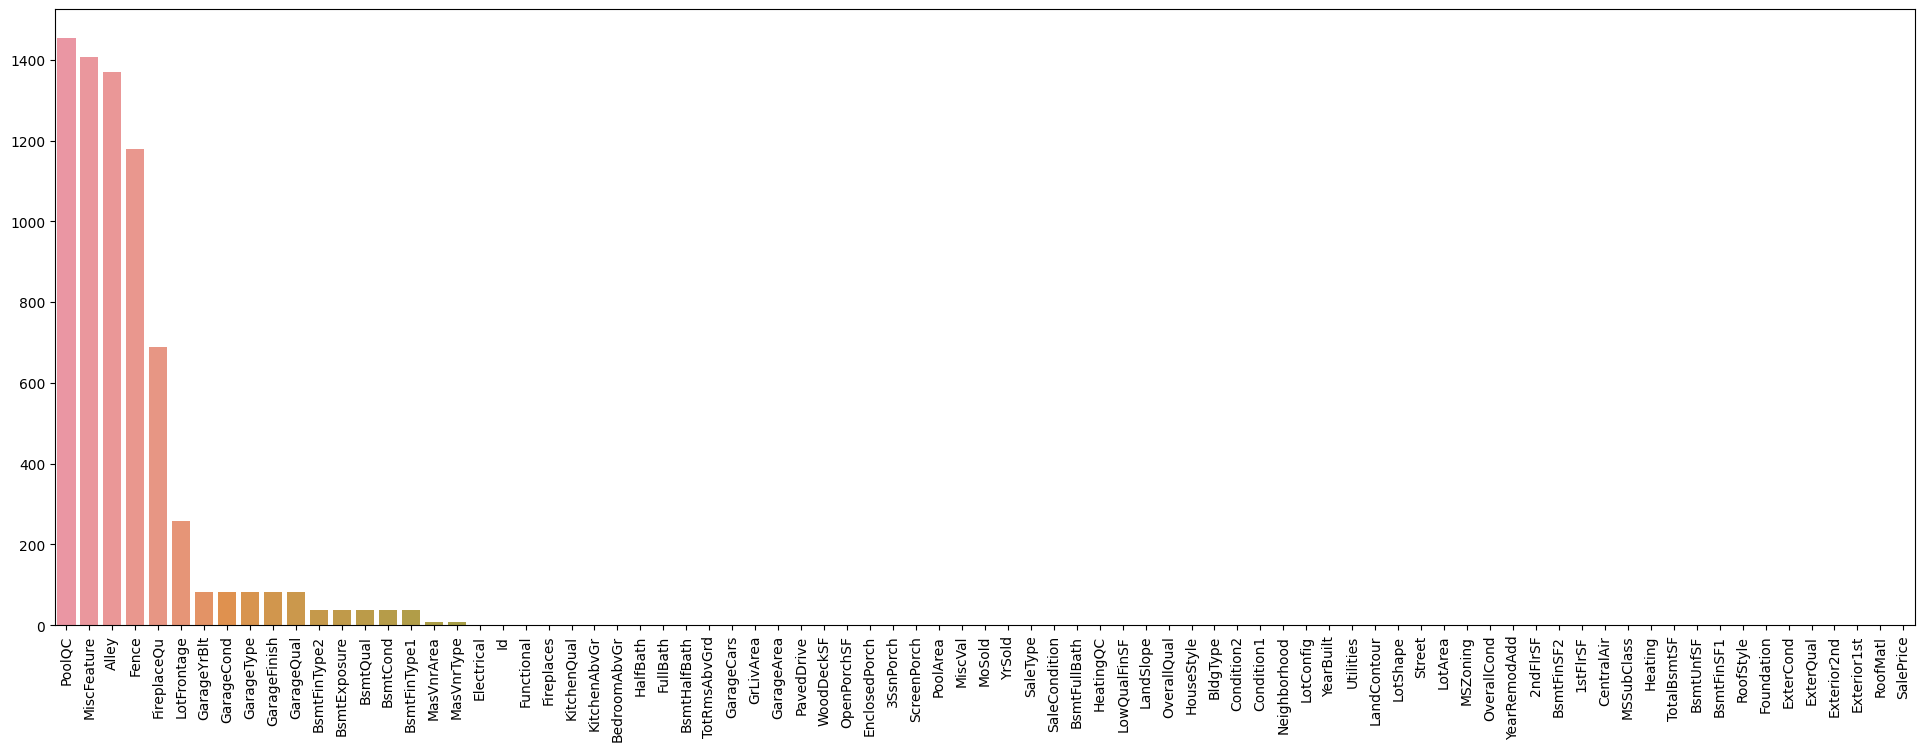

In [ ]:
plt.figure(figsize=(24,8))
cols_with_null=train.isnull().sum().sort_values(ascending=False)
sns.barplot(x=cols_with_null.index,y=cols_with_null)
plt.xticks(rotation=90)
plt.show;

In [ ]:
cols_with_null.head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
dtype: int64

In [ ]:
cols_to_drop=(cols_with_null.head(6).index).tolist()
train.drop(cols_to_drop,axis=1,inplace=True)
test.drop(cols_to_drop,axis=1,inplace=True)
train.shape

(1460, 75)

In [ ]:
pd.isnull(test).sum()

Id               0
MSSubClass       0
MSZoning         4
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 74, dtype: int64

<ipython-input-111-e44f681ae1c9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap=sns.heatmap(train.corr(), center=0, cmap='BrBG', annot=True)


<Axes: >

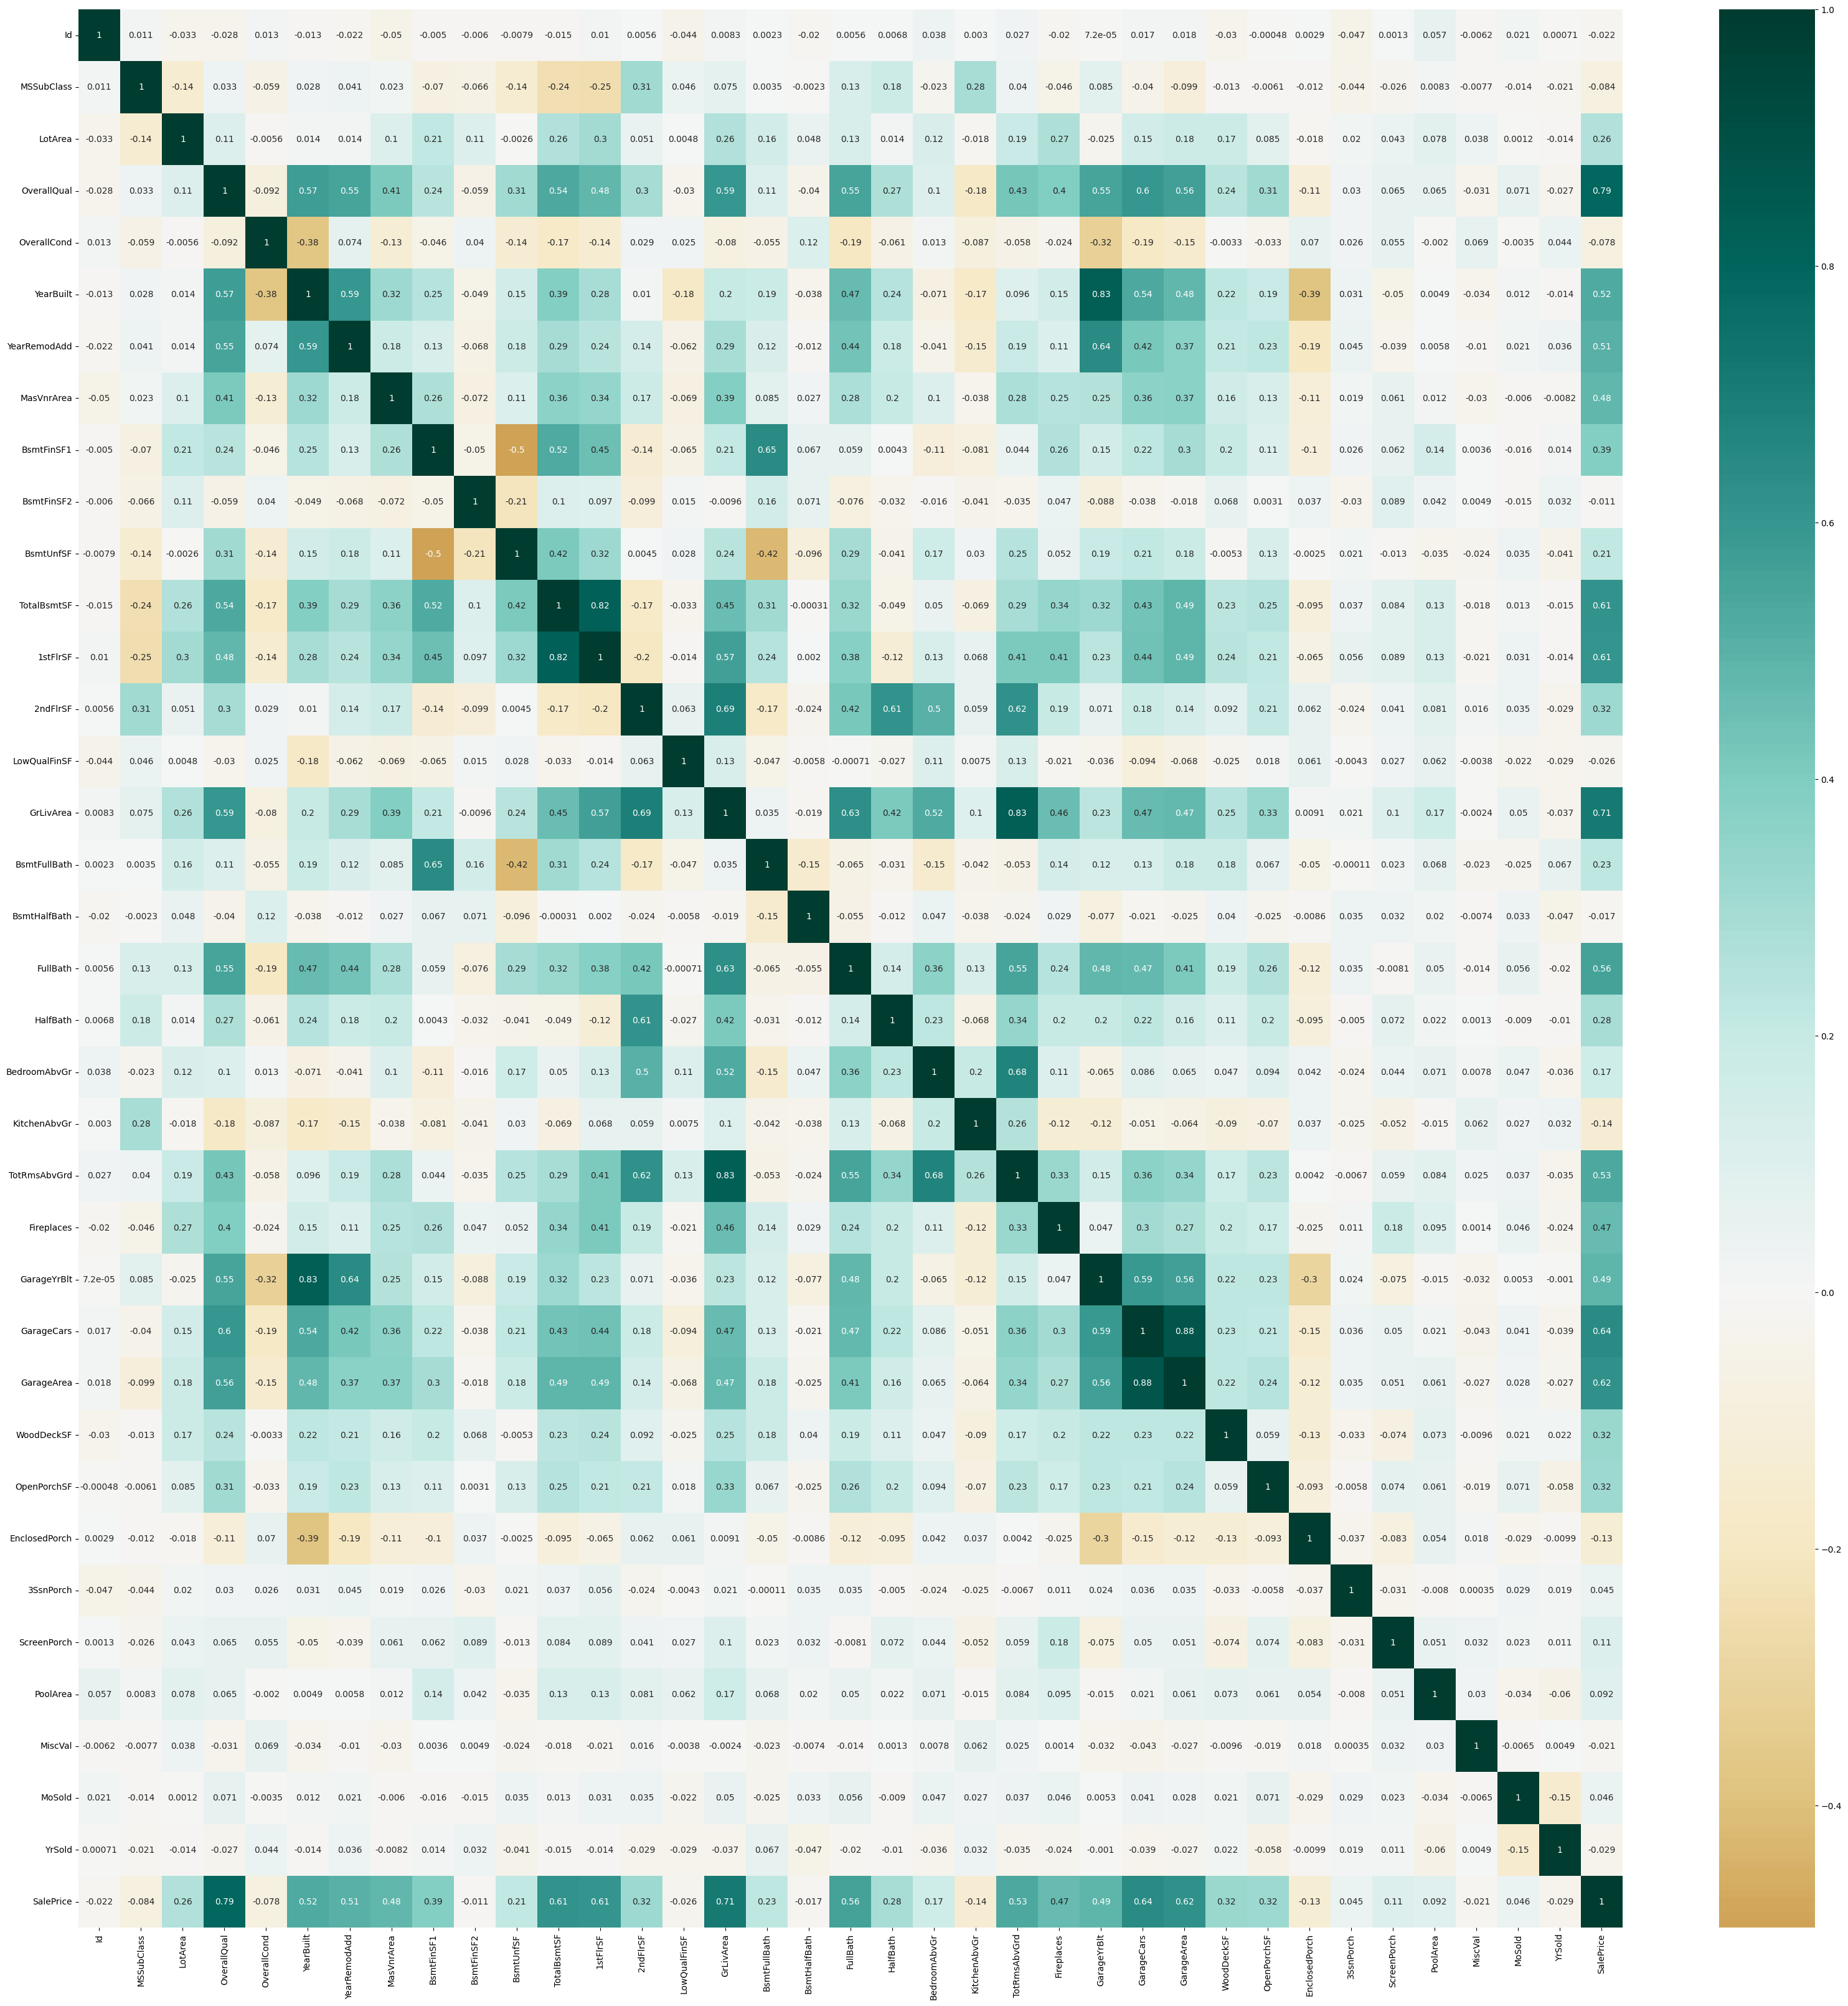

In [ ]:
fig, ax = plt.subplots(figsize=(40,40))
heatmap=sns.heatmap(train.corr(), center=0, cmap='BrBG', annot=True)
heatmap


**Drop the features which is not correlate with target value**

In [ ]:
li=[]
for row in train.corr():
    #for col in range(len(train.corr()[row])):
    # train.corr()[row][36]< 0.12:
    value = train.corr()[row][36]
    if value < 0.12:
   # print(f"{row}: {value}")
      print(row,value)
      li.append(f"{row}")
print(li,len(li))



<ipython-input-112-3cd865df3dd3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  for row in train.corr():
<ipython-input-112-3cd865df3dd3>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  value = train.corr()[row][36]


Id -0.021916719443430967
MSSubClass -0.08428413512659509
OverallCond -0.07785589404867797
BsmtFinSF2 -0.011378121450215146
LowQualFinSF -0.02560613000067955
BsmtHalfBath -0.01684415429735895
KitchenAbvGr -0.13590737084214105
EnclosedPorch -0.1285779579259566
3SsnPorch 0.04458366533574838
ScreenPorch 0.11144657114291112
PoolArea 0.09240354949187318
MiscVal -0.021189579640303213
MoSold 0.046432245223819446
YrSold -0.028922585168736813
['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'] 14


In [ ]:
li2=[]
for row in train.corr():
    #for col in range(len(train.corr()[row])):
    # train.corr()[row][36]< 0.12:
    value = train.corr()[row][36]
    if value > 0.12:
   # print(f"{row}: {value}")
      print(row,value)
      li2.append(f"{row}")
print(li2,len(li2))


LotArea 0.2638433538714051


<ipython-input-113-f0073ca76edc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  for row in train.corr():
<ipython-input-113-f0073ca76edc>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  value = train.corr()[row][36]


OverallQual 0.7909816005838053
YearBuilt 0.5228973328794967
YearRemodAdd 0.5071009671113866
MasVnrArea 0.47749304709571444
BsmtFinSF1 0.3864198062421535
BsmtUnfSF 0.21447910554696928
TotalBsmtSF 0.6135805515591943
1stFlrSF 0.6058521846919153
2ndFlrSF 0.31933380283206736
GrLivArea 0.7086244776126515
BsmtFullBath 0.22712223313149427
FullBath 0.5606637627484453
HalfBath 0.28410767559478256
BedroomAbvGr 0.16821315430073963
TotRmsAbvGrd 0.5337231555820284
Fireplaces 0.46692883675152763
GarageYrBlt 0.4863616774878596
GarageCars 0.6404091972583519
GarageArea 0.6234314389183622
WoodDeckSF 0.32441344456812926
OpenPorchSF 0.31585622711605504
SalePrice 1.0
['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'] 23


In [ ]:
train.drop(li,axis=1,inplace=True)

In [ ]:
test.drop(li,axis=1,inplace=True)

In [ ]:
train.shape

(1460, 61)

In [ ]:
test.shape

(1459, 60)

# Remove Outliers from data

<ipython-input-118-20c2f8f98d4e>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(17,1))


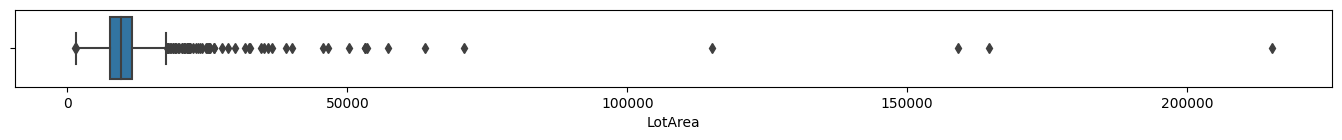

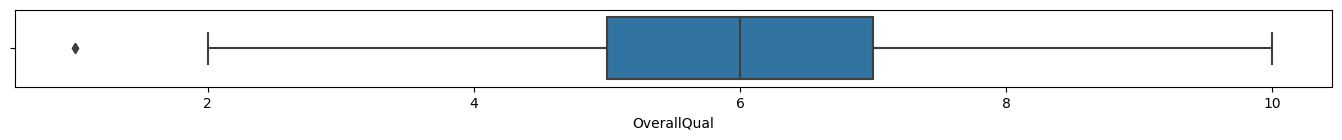

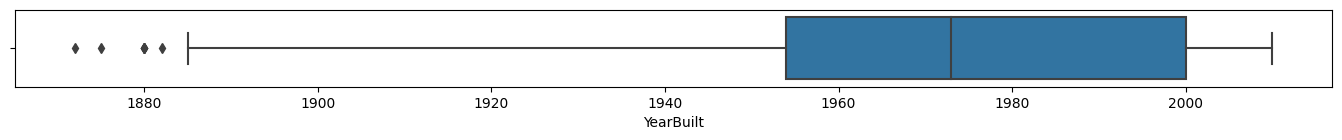

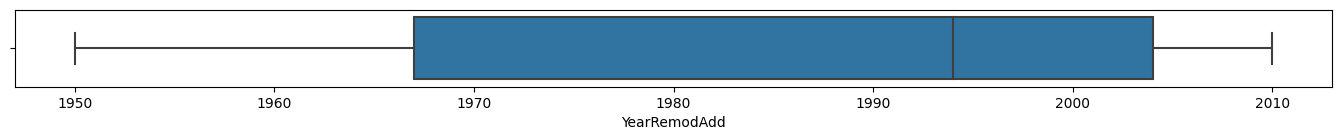

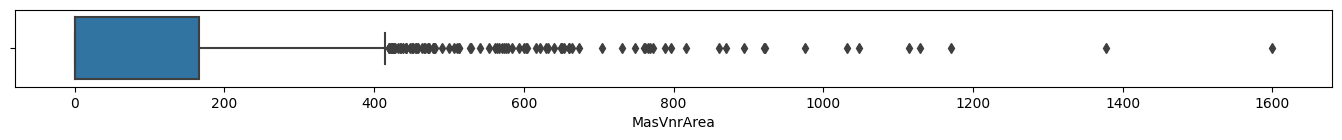

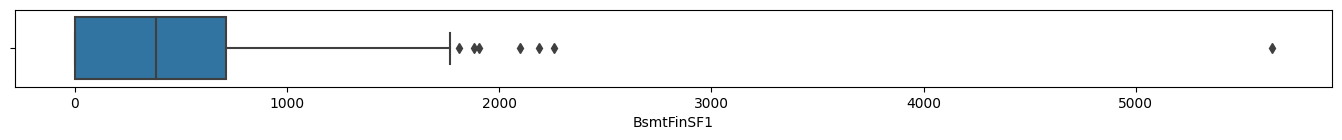

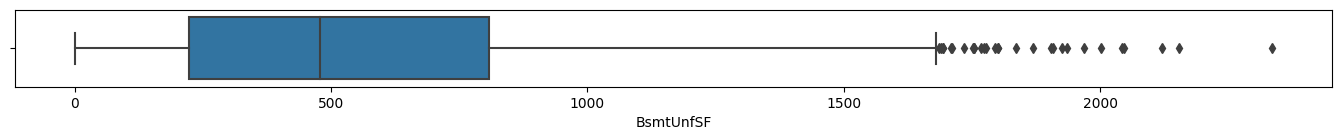

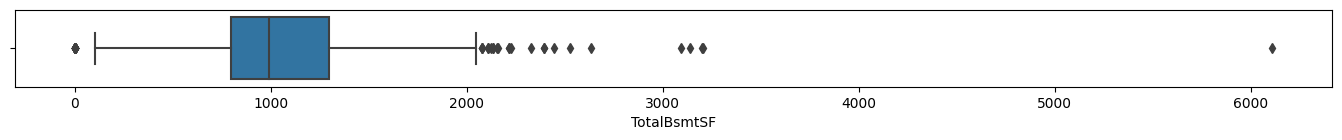

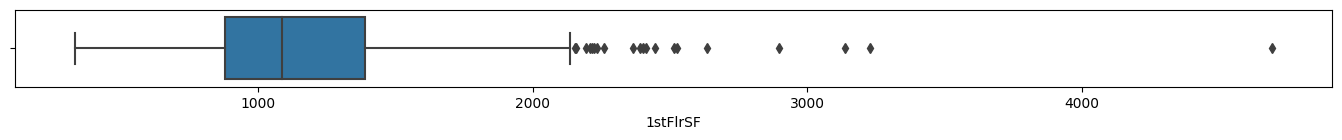

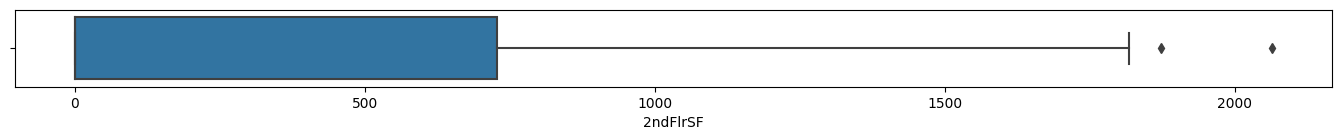

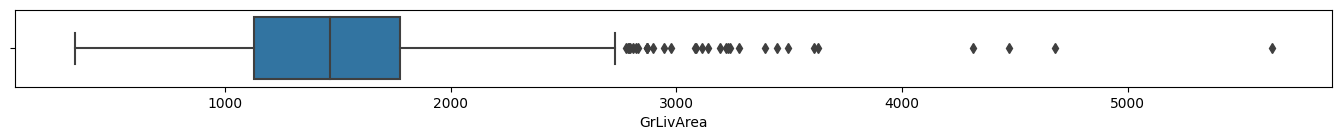

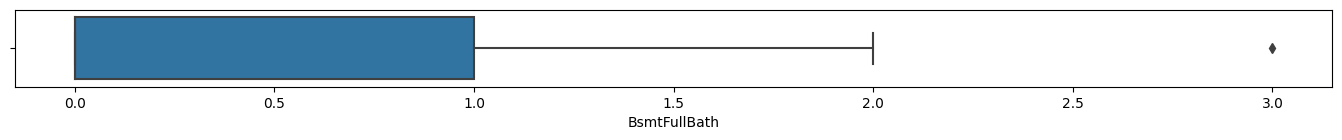

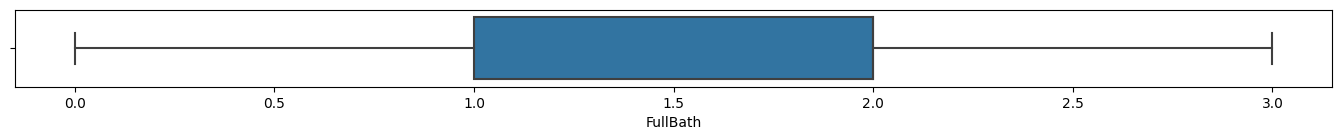

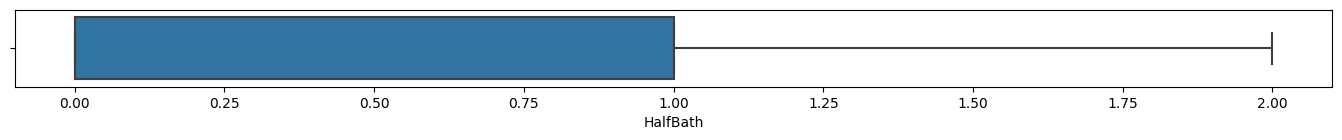

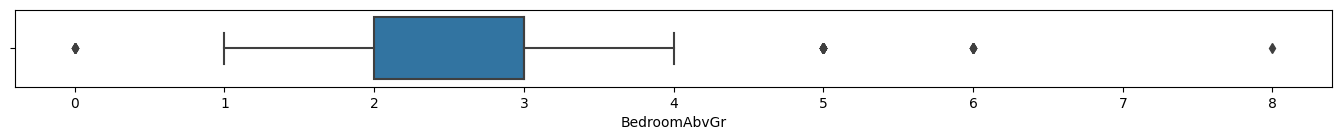

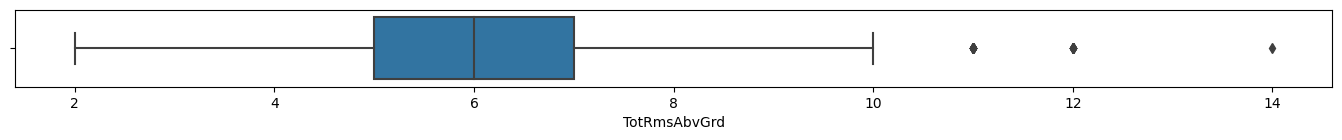

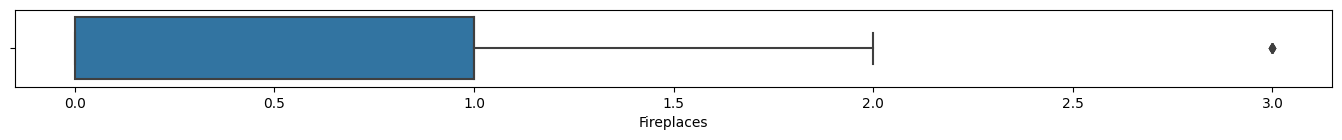

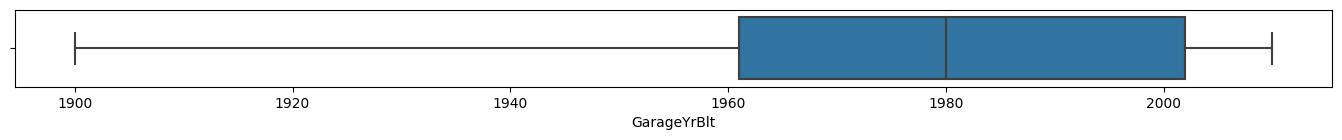

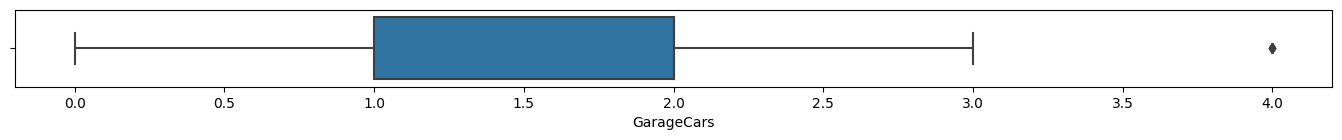

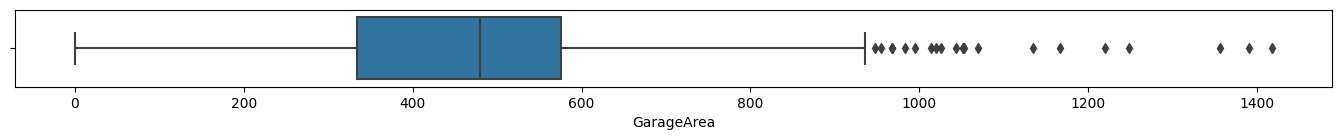

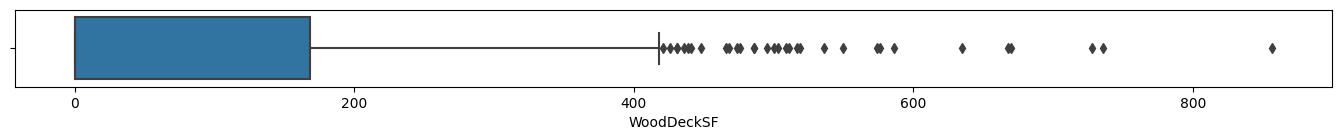

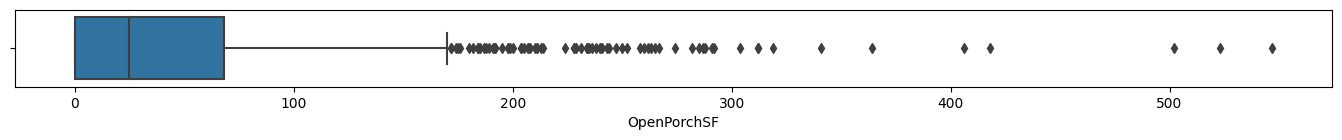

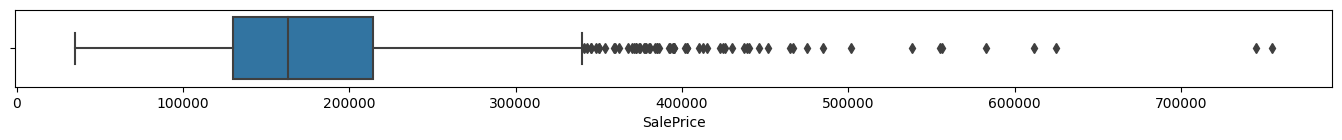

In [ ]:
# Box Plot
import seaborn as sns
for i in li2:
  #sns.boxplot(train[i])
  plt.figure(figsize=(17,1))
  sns.boxplot(data=train, x=i)



In [ ]:
# Importing
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd

''' Detection '''
# IQR
# Calculate the upper and lower limits
for i in li2:
#i='SalePrice'
  Q1 = train[i].quantile(0.25)
  Q3 = train[i].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR

  # Create arrays of Boolean values indicating the outlier rows
  upper_array = np.where(train[i]>=upper)[0]
  lower_array = np.where(train[i]<=lower)[0]
  # print(upper_array,lower_array,lower,upper,i)
  # for i in upper_array:
  #   print(train['SalePrice'].iloc[i])


  # Removing the outliers
  # for j in upper_array:
  train.drop(train.index[upper_array],inplace=True)
  train.drop(train.index[lower_array],inplace=True)
# train.drop(upper_array)
# train.drop(index=lower_array,axis=0,inplace=True)

# Print the new shape of the DataFrame
#print("New Shape: ", df_diabetes.shape)


<ipython-input-120-87b3d22741eb>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(17,1))


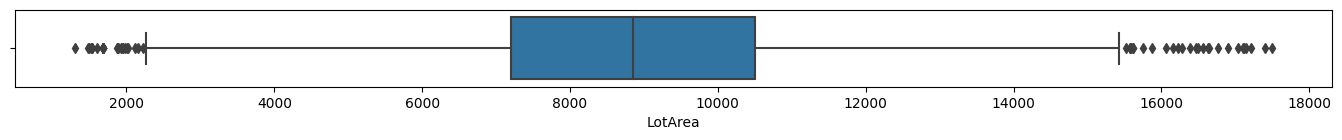

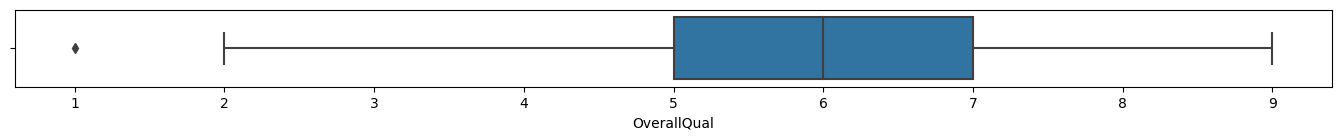

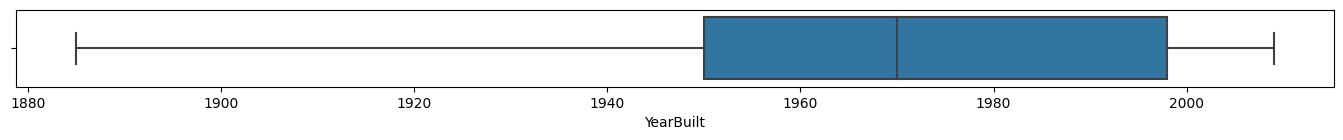

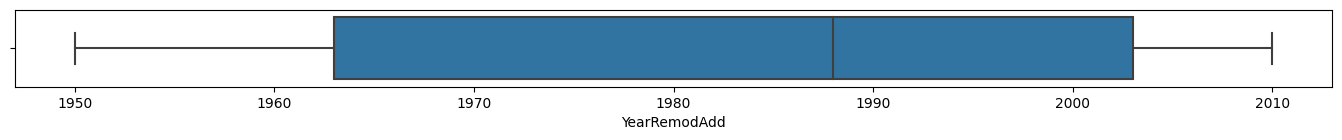

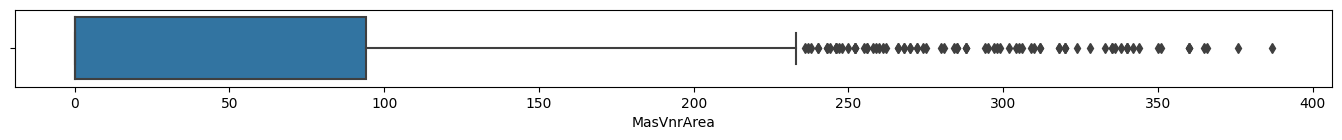

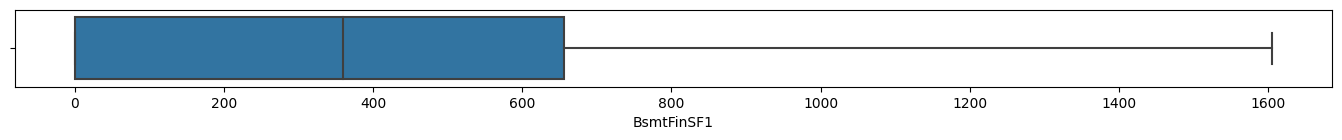

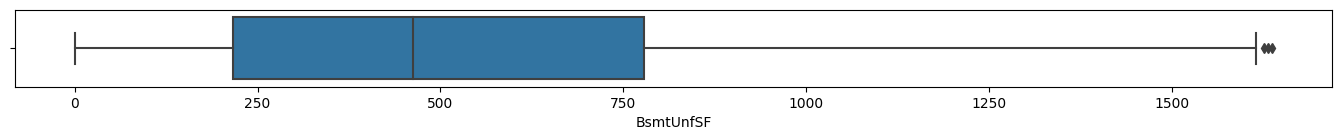

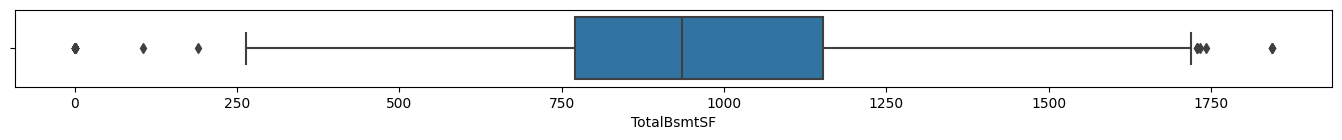

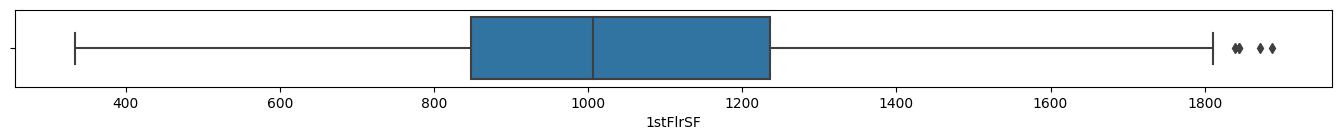

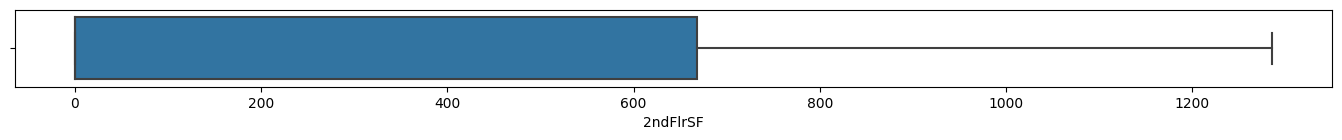

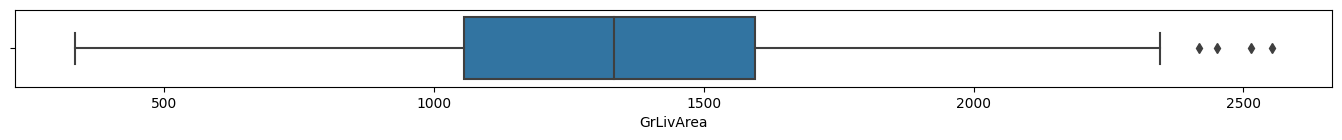

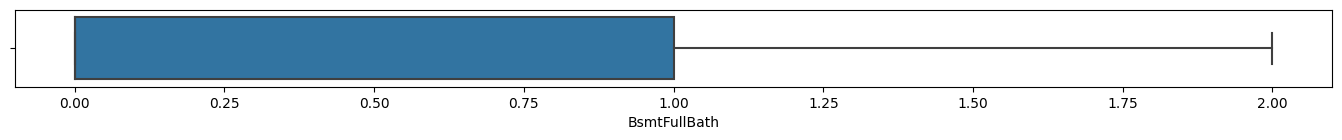

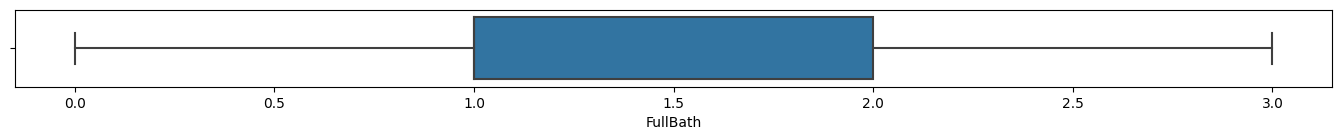

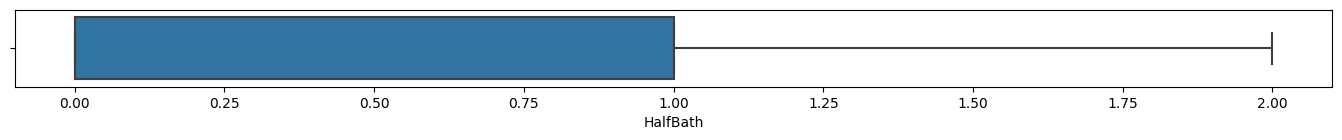

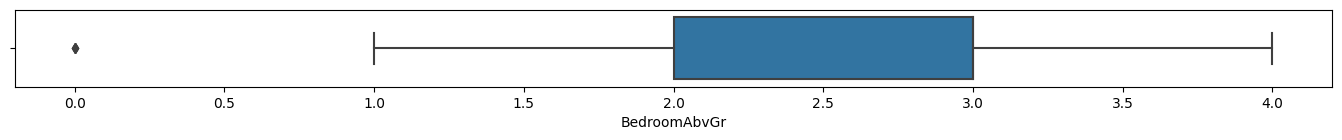

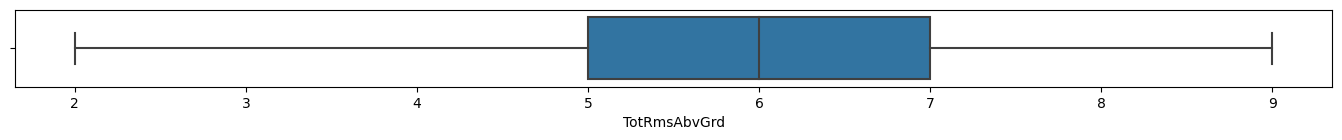

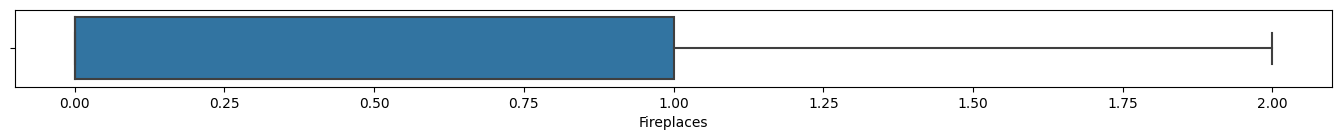

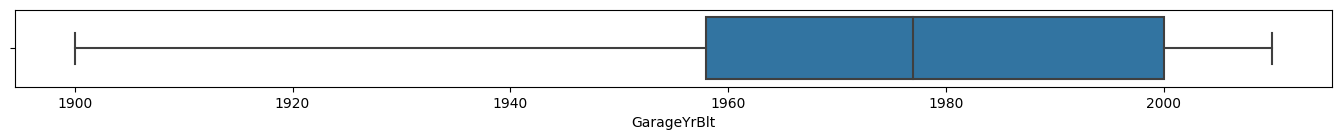

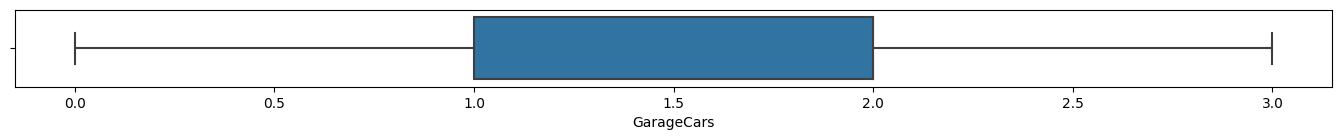

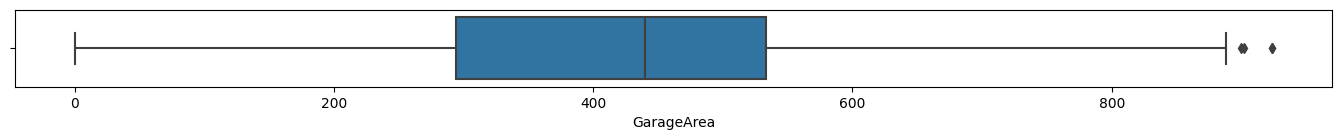

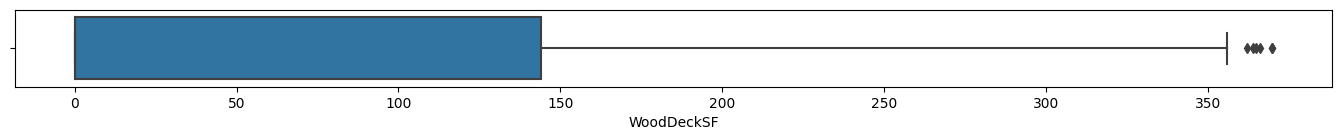

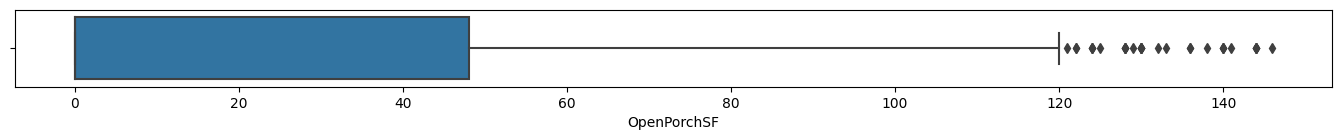

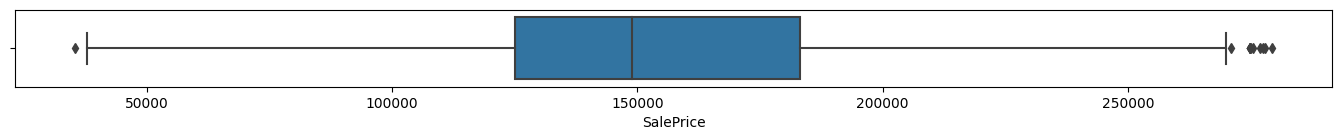

In [ ]:
# Box Plot
import seaborn as sns
for i in li2:
  #sns.boxplot(train[i])
  plt.figure(figsize=(17,1))
  sns.boxplot(data=train, x=i)

In [ ]:
train.describe()

LotArea  OverallQual    YearBuilt  YearRemodAdd   MasVnrArea  \
count   1009.000000  1009.000000  1009.000000   1009.000000  1004.000000   
mean    8790.912785     5.791873  1968.683845   1982.608523    55.055777   
std     3062.966681     1.136643    28.978751     20.992023    93.930464   
min     1300.000000     1.000000  1885.000000   1950.000000     0.000000   
25%     7200.000000     5.000000  1950.000000   1963.000000     0.000000   
50%     8846.000000     6.000000  1970.000000   1988.000000     0.000000   
75%    10500.000000     7.000000  1998.000000   2003.000000    94.000000   
max    17503.000000     9.000000  2009.000000   2010.000000   387.000000   

        BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  ...  \
count  1009.000000  1009.000000  1009.000000  1009.000000  1009.000000  ...   
mean    387.482656   531.027750   960.481665  1057.137760   281.810704  ...   
std     368.345763   389.362178   320.000921   281.647245   371.108396  ...   
min       0.000000     0.000000     0.000000   334.000000     0.000000  ...   
25%       0.000000   216.000000   770.000000   848.000000     0.000000  ...   
50%     360.000000   463.000000   935.000000  1007.000000     0.000000  ...   
75%     656.000000   778.000000  1153.000000  1236.000000   668.000000  ...   
max    1606.000000  1638.000000  1845.000000  1888.000000  1286.000000  ...   

          HalfBath  BedroomAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count  1009.000000   1009.000000   1009.000000  1009.000000   947.000000   
mean      0.336967      2.748266      6.066402     0.494549  1975.669483   
std       0.491426      0.692977      1.244253     0.594469    24.967115   
min       0.000000      0.000000      2.000000     0.000000  1900.000000   
25%       0.000000      2.000000      5.000000     0.000000  1958.000000   
50%       0.000000      3.000000      6.000000     0.000000  1977.000000   
75%       1.000000      3.000000      7.000000     1.000000  2000.000000   
max       2.000000      4.000000      9.000000     2.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF      SalePrice  
count  1009.000000  1009.000000  1009.000000  1009.000000    1009.000000  
mean      1.596630   421.264618    73.489594    27.935580  155406.633300  
std       0.664303   180.106165    97.165830    37.557586   46023.646658  
min       0.000000     0.000000     0.000000     0.000000   35311.000000  
25%       1.000000   294.000000     0.000000     0.000000  125000.000000  
50%       2.000000   440.000000     0.000000     0.000000  149000.000000  
75%       2.000000   533.000000   144.000000    48.000000  183200.000000  
max       3.000000   924.000000   370.000000   146.000000  279500.000000  

[8 rows x 23 columns]

**Fill null value by mean**

In [ ]:
# Fill null values with the mean of each column
df = train.fillna(train.mean())
test = test.fillna(train.mean())

# Save the modified DataFrame to a new CSV file
#df.to_csv('filled_file.csv', index=False)

<ipython-input-122-8d15256e8a59>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = train.fillna(train.mean())
<ipython-input-122-8d15256e8a59>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test = test.fillna(train.mean())


In [ ]:
df.shape

(1009, 61)

# Fill null value in string columns by max catogery

In [ ]:
string_object=[]
for idx,i in enumerate(df.dtypes):
  if i == 'object':
    string_object.append(df.columns[idx])
    df[df.columns[idx]].fillna(df[df.columns[idx]].value_counts().idxmax(), inplace = True)
    print("{}---------------{}".format(df.columns[idx],i))

MSZoning---------------object
Street---------------object
LotShape---------------object
LandContour---------------object
Utilities---------------object
LotConfig---------------object
LandSlope---------------object
Neighborhood---------------object
Condition1---------------object
Condition2---------------object
BldgType---------------object
HouseStyle---------------object
RoofStyle---------------object
RoofMatl---------------object
Exterior1st---------------object
Exterior2nd---------------object
MasVnrType---------------object
ExterQual---------------object
ExterCond---------------object
Foundation---------------object
BsmtQual---------------object
BsmtCond---------------object
BsmtExposure---------------object
BsmtFinType1---------------object
BsmtFinType2---------------object
Heating---------------object
HeatingQC---------------object
CentralAir---------------object
Electrical---------------object
KitchenQual---------------object
Functional---------------object
GarageType------------

In [ ]:
string_object1=[]
for idx,i in enumerate(test.dtypes):
  if i == 'object':
    string_object1.append(test.columns[idx])
    test[test.columns[idx]].fillna(test[test.columns[idx]].value_counts().idxmax(), inplace = True)
    print("{}---------------{}".format(test.columns[idx],i))

MSZoning---------------object
Street---------------object
LotShape---------------object
LandContour---------------object
Utilities---------------object
LotConfig---------------object
LandSlope---------------object
Neighborhood---------------object
Condition1---------------object
Condition2---------------object
BldgType---------------object
HouseStyle---------------object
RoofStyle---------------object
RoofMatl---------------object
Exterior1st---------------object
Exterior2nd---------------object
MasVnrType---------------object
ExterQual---------------object
ExterCond---------------object
Foundation---------------object
BsmtQual---------------object
BsmtCond---------------object
BsmtExposure---------------object
BsmtFinType1---------------object
BsmtFinType2---------------object
Heating---------------object
HeatingQC---------------object
CentralAir---------------object
Electrical---------------object
KitchenQual---------------object
Functional---------------object
GarageType------------

# **Label Encoding**

In [ ]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
for str_obj in string_object:
  print(str_obj)
  df[str_obj]= label_encoder.fit_transform(df[str_obj])

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [ ]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
for str_obj in string_object1:
  print(str_obj)
  test[str_obj]= label_encoder.fit_transform(test[str_obj])

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [ ]:
df.corr()

MSZoning   LotArea    Street  LotShape  LandContour  Utilities  \
MSZoning       1.000000 -0.197261  0.066720  0.104617    -0.017206        NaN   
LotArea       -0.197261  1.000000 -0.015770 -0.267806     0.032116        NaN   
Street         0.066720 -0.015770  1.000000 -0.011457     0.144842        NaN   
LotShape       0.104617 -0.267806 -0.011457  1.000000     0.068931        NaN   
LandContour   -0.017206  0.032116  0.144842  0.068931     1.000000        NaN   
...                 ...       ...       ...       ...          ...        ...   
WoodDeckSF    -0.018220  0.077213  0.021455 -0.115414     0.037058        NaN   
OpenPorchSF   -0.211826  0.086397  0.025121 -0.065523     0.062696        NaN   
SaleType       0.109436  0.013929 -0.015710 -0.030033    -0.040604        NaN   
SaleCondition  0.017922  0.016086  0.018896 -0.033049     0.028657        NaN   
SalePrice     -0.247365  0.321791  0.071911 -0.263369     0.061118        NaN   

               LotConfig  LandSlope  Neighborhood  Condition1  ...  \
MSZoning        0.017972  -0.065349     -0.218335    0.001371  ...   
LotArea        -0.167927   0.020817      0.119623    0.073787  ...   
Street          0.014893  -0.166799      0.028534   -0.132004  ...   
LotShape        0.207634  -0.030974     -0.040804   -0.113142  ...   
LandContour    -0.017432  -0.390299     -0.019639    0.024248  ...   
...                  ...        ...           ...         ...  ...   
WoodDeckSF      0.018504   0.040815     -0.000342   -0.005252  ...   
OpenPorchSF     0.000657  -0.023906      0.125857    0.035242  ...   
SaleType        0.010298   0.033962     -0.002904   -0.008508  ...   
SaleCondition   0.040369  -0.078998     -0.002242    0.040670  ...   
SalePrice      -0.031029   0.002890      0.096417    0.113884  ...   

               GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  \
MSZoning        -0.159402   -0.207862   -0.141396   -0.079587   -0.097205   
LotArea          0.171489    0.220040    0.028034    0.003792    0.059756   
Street           0.021655    0.024652   -0.012678   -0.010797    0.057013   
LotShape        -0.158086   -0.144330   -0.113720   -0.066001   -0.111744   
LandContour      0.054196    0.073947    0.016259    0.000113    0.147571   
...                   ...         ...         ...         ...         ...   
WoodDeckSF       0.155528    0.136907    0.086482    0.081383    0.083238   
OpenPorchSF      0.255387    0.243256    0.040751    0.054407    0.066763   
SaleType        -0.053678   -0.073673   -0.015780   -0.018941   -0.044366   
SaleCondition    0.128811    0.105912    0.040425    0.014116    0.035261   
SalePrice        0.605946    0.567077    0.157971    0.163182    0.299938   

               WoodDeckSF  OpenPorchSF  SaleType  SaleCondition  SalePrice  
MSZoning        -0.018220    -0.211826  0.109436       0.017922  -0.247365  
LotArea          0.077213     0.086397  0.013929       0.016086   0.321791  
Street           0.021455     0.025121 -0.015710       0.018896   0.071911  
LotShape        -0.115414    -0.065523 -0.030033      -0.033049  -0.263369  
LandContour      0.037058     0.062696 -0.040604       0.028657   0.061118  
...                   ...          ...       ...            ...        ...  
WoodDeckSF       1.000000     0.053018  0.060356       0.033564   0.236017  
OpenPorchSF      0.053018     1.000000 -0.001347       0.093310   0.392782  
SaleType         0.060356    -0.001347  1.000000       0.249027   0.016650  
SaleCondition    0.033564     0.093310  0.249027       1.000000   0.224077  
SalePrice        0.236017     0.392782  0.016650       0.224077   1.000000  

[61 rows x 61 columns]

<Axes: >

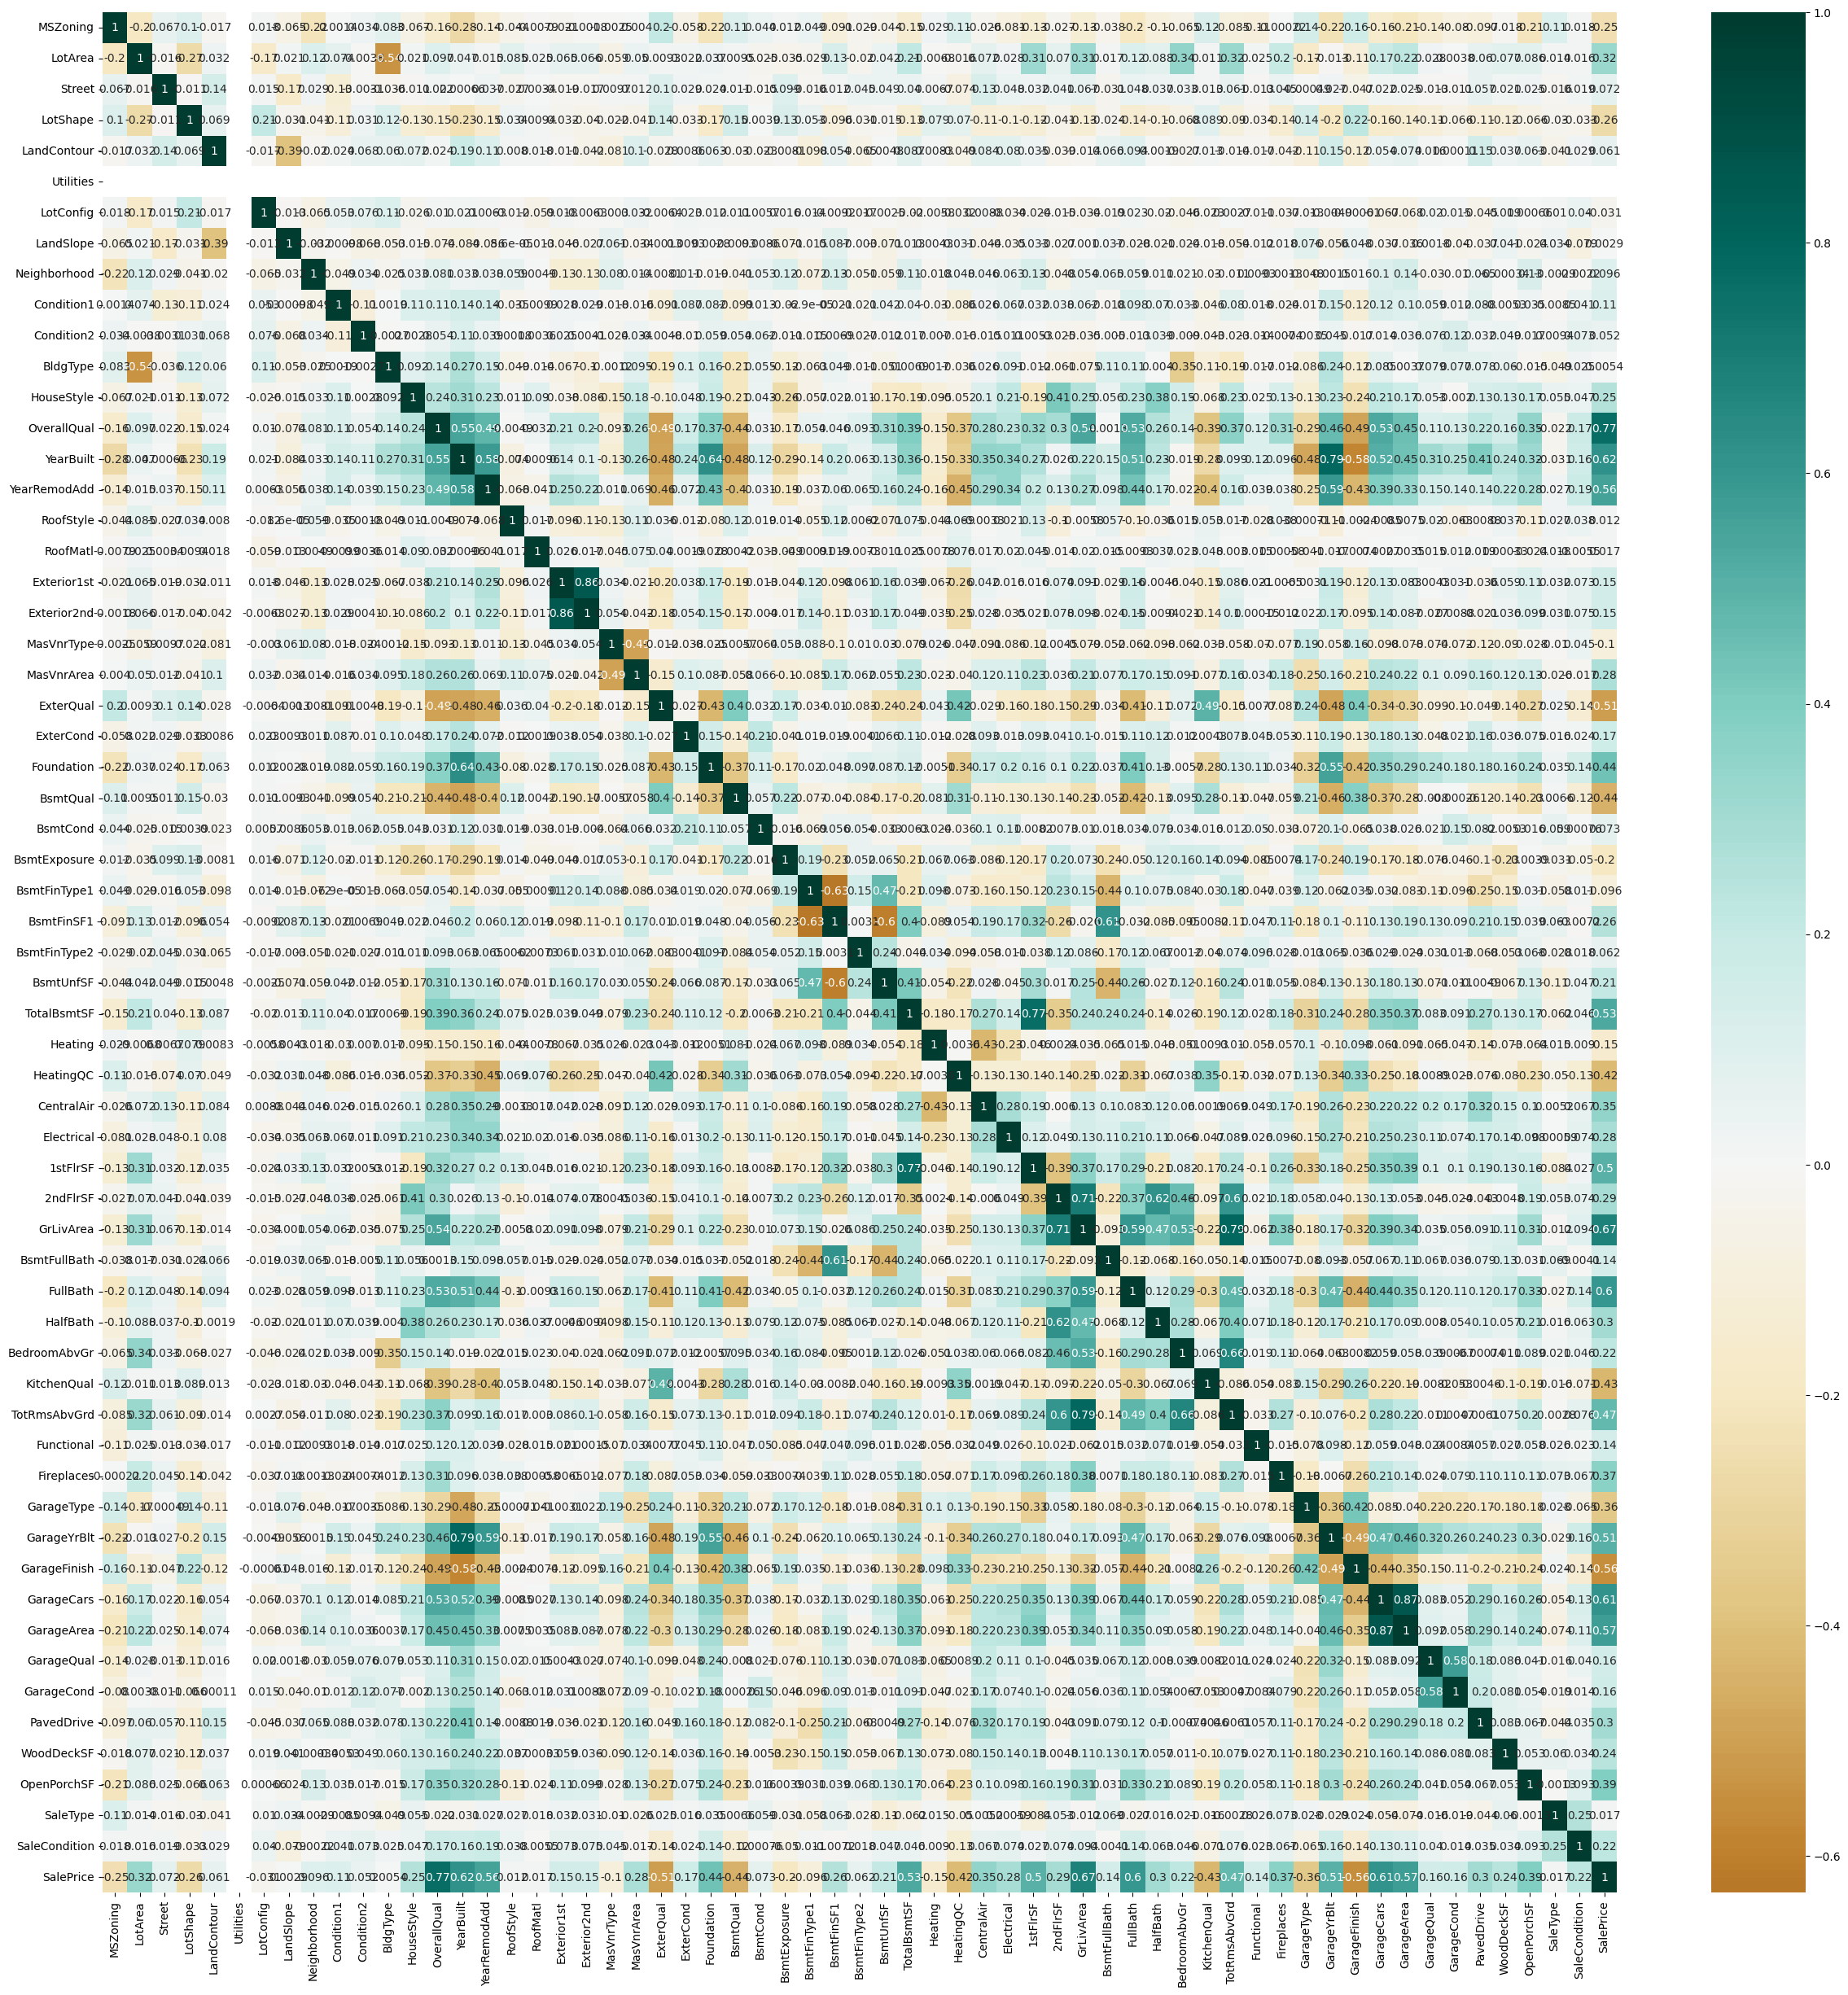

In [ ]:
fig, ax = plt.subplots(figsize=(30,30))
heatmap=sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)
heatmap

In [ ]:
li=[]
for row in df.corr():
    #for col in range(len(train.corr()[row])):
    # train.corr()[row][36]< 0.12:
    value = df.corr()[row][60]
    #print(value)
    if value < 0.12:

      #print(row,value)
      li.append(f"{row}")
print(li,len(li))

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'SaleType'] 28


In [ ]:
df.drop(li,axis=1,inplace=True)

In [ ]:
test.drop(li,axis=1,inplace=True)

In [ ]:
li2=['Exterior2nd','TotRmsAbvGrd','2ndFlrSF','GarageCars','GarageYrBlt']
li_test=['Exterior2nd','TotRmsAbvGrd','2ndFlrSF','GarageCars','GarageYrBlt']

In [ ]:
'Exterior2nd','TotRmsAbvGrd','2ndFlrSF',

('Exterior2nd', 'TotRmsAbvGrd', '2ndFlrSF')

In [ ]:
df.drop(li2,axis=1,inplace=True)

In [ ]:
test.drop(li_test,axis=1,inplace=True)

In [ ]:
df.columns

Index(['MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'Functional', 'Fireplaces',
       'GarageType', 'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X=df.iloc[:,:-1]

In [ ]:
y=df.iloc[:,-1:]

In [ ]:
X_trainL, X_testL, y_trainL, y_testL = train_test_split(X, y, test_size=0.1, random_state=10)


In [ ]:
model = LinearRegression()
model.fit(X_trainL, y_trainL)
#model.fit(X, y)

LinearRegression()

In [ ]:
#model.score(X_train, y_train)
score_Linear= model.score(X_testL, y_testL)


In [ ]:
mse_Linear = mean_squared_error(y,model.predict(X))
print(score_Linear,mse_Linear)

#best till now
#0.8448831078453399 247640256.39044142

0.8760548835298645 247629254.72902846


In [ ]:
y_pred=model.predict(np.array(test.iloc[:,:].values))
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[129547.07070598],
       [172588.00277032],
       [191900.25673117],
       ...,
       [170946.32297424],
       [129874.92025922],
       [230813.74574823]])

In [ ]:
test.head(10)

MSZoning  LotArea  Street  LotShape  LandContour  Utilities  LotConfig  \
0         2    11622       1         3            3          0          4   
1         3    14267       1         0            3          0          0   
2         3    13830       1         0            3          0          4   
3         3     9978       1         0            3          0          4   
4         3     5005       1         0            1          0          4   
5         3    10000       1         0            3          0          0   
6         3     7980       1         0            3          0          4   
7         3     8402       1         0            3          0          4   
8         3    10176       1         3            3          0          4   
9         3     8400       1         3            3          0          0   

   LandSlope  Neighborhood  Condition1  ...  GarageType  GarageFinish  \
0          0            12           1  ...           1             2   
1          0            12           2  ...           1             2   
2          0             8           2  ...           1             0   
3          0             8           2  ...           1             0   
4          0            22           2  ...           1             1   
5          0             8           2  ...           1             0   
6          0             8           2  ...           1             0   
7          0             8           2  ...           1             0   
8          0             8           2  ...           1             2   
9          0            12           2  ...           1             0   

   GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
0       730.0           3           4           2         140            0   
1       312.0           3           4           2         393           36   
2       482.0           3           4           2         212           34   
3       470.0           3           4           2         360           36   
4       506.0           3           4           2           0           82   
5       440.0           3           4           2         157           84   
6       420.0           3           4           2         483           21   
7       393.0           3           4           2           0           75   
8       506.0           3           4           2         192            0   
9       525.0           3           4           2         240            0   

   SaleType  SaleCondition  
0         8              4  
1         8              4  
2         8              4  
3         8              4  
4         8              4  
5         8              4  
6         8              4  
7         8              4  
8         8              4  
9         8              4  

[10 rows x 55 columns]

# Save Test CSV

In [ ]:
testf=pd.read_csv("/content/drive/MyDrive/house_prices_regression_techniques/test.csv")

In [ ]:
testf['Id'].values.reshape(-1,1).shape

(1459, 1)

In [ ]:
data_save = pd.DataFrame({"Id":testf['Id'],"SalePrice":y_pred.flatten()})
data_save.to_csv("house_predictli.csv",index=False)

In [ ]:
model.predict(np.array(test.iloc[0:10,:].values))
#model.predict(np.array(X_train.iloc[0:10,:].values))
#test

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[130089.85673282],
       [173551.03127422],
       [191825.5214557 ],
       [197840.24182318],
       [192989.18746215],
       [182390.53561105],
       [182599.28207658],
       [171942.05299828],
       [198868.20119302],
       [124130.1490547 ]])

# **XGBoost**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
!pip install xgboost
from xgboost import XGBRegressor


In [ ]:
trainXG=pd.read_csv("/content/drive/MyDrive/train_house_price.csv")
testXG=pd.read_csv("/content/drive/MyDrive/house_prices_regression_techniques/test.csv")


In [ ]:
trainXG

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [ ]:
cols_to_drop=(trainXG.isnull().sum().sort_values(ascending=False).head(6).index).tolist()
trainXG.drop(cols_to_drop,axis=1,inplace=True)
testXG.drop(cols_to_drop,axis=1,inplace=True)
testXG.shape

(1459, 74)

In [ ]:
# Fill null values with the mean of each column
trainXG = trainXG.fillna(train.mean())
testXG = testXG.fillna(train.mean())

<ipython-input-275-6e7374821e56>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  trainXG = trainXG.fillna(train.mean())
<ipython-input-275-6e7374821e56>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  testXG = testXG.fillna(train.mean())


In [ ]:
string_object=[]
for idx,i in enumerate(trainXG.dtypes):
  if i == 'object':
    string_object.append(trainXG.columns[idx])
    trainXG[trainXG.columns[idx]].fillna(trainXG[trainXG.columns[idx]].value_counts().idxmax(), inplace = True)
    print("{}---------------{}".format(trainXG.columns[idx],i))


MSZoning---------------object
Street---------------object
LotShape---------------object
LandContour---------------object
Utilities---------------object
LotConfig---------------object
LandSlope---------------object
Neighborhood---------------object
Condition1---------------object
Condition2---------------object
BldgType---------------object
HouseStyle---------------object
RoofStyle---------------object
RoofMatl---------------object
Exterior1st---------------object
Exterior2nd---------------object
MasVnrType---------------object
ExterQual---------------object
ExterCond---------------object
Foundation---------------object
BsmtQual---------------object
BsmtCond---------------object
BsmtExposure---------------object
BsmtFinType1---------------object
BsmtFinType2---------------object
Heating---------------object
HeatingQC---------------object
CentralAir---------------object
Electrical---------------object
KitchenQual---------------object
Functional---------------object
GarageType------------

In [ ]:
string_object=[]
for idx,i in enumerate(testXG.dtypes):
  if i == 'object':
    string_object.append(testXG.columns[idx])
    testXG[testXG.columns[idx]].fillna(testXG[testXG.columns[idx]].value_counts().idxmax(), inplace = True)
    print("{}---------------{}".format(testXG.columns[idx],i))

MSZoning---------------object
Street---------------object
LotShape---------------object
LandContour---------------object
Utilities---------------object
LotConfig---------------object
LandSlope---------------object
Neighborhood---------------object
Condition1---------------object
Condition2---------------object
BldgType---------------object
HouseStyle---------------object
RoofStyle---------------object
RoofMatl---------------object
Exterior1st---------------object
Exterior2nd---------------object
MasVnrType---------------object
ExterQual---------------object
ExterCond---------------object
Foundation---------------object
BsmtQual---------------object
BsmtCond---------------object
BsmtExposure---------------object
BsmtFinType1---------------object
BsmtFinType2---------------object
Heating---------------object
HeatingQC---------------object
CentralAir---------------object
Electrical---------------object
KitchenQual---------------object
Functional---------------object
GarageType------------

In [ ]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
for str_obj in string_object1:
  print(str_obj)
  trainXG[str_obj]= label_encoder.fit_transform(trainXG[str_obj])

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [ ]:
testXG.isnull().sum().tail(45)

BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        1
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      2
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageType        0
GarageYrBlt      78
GarageFinish      0
GarageCars        0
GarageArea        0
GarageQual        0
GarageCond        0
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
dtype: int64

In [ ]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
for str_obj in string_object1:
  #print(str_obj)
  testXG[str_obj]= label_encoder.fit_transform(testXG[str_obj])

In [ ]:
trainXG.isnull().sum().head(80)

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [ ]:
trainXG

Id  MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  \
0        1          60         3     8450       1         3            3   
1        2          20         3     9600       1         3            3   
2        3          60         3    11250       1         0            3   
3        4          70         3     9550       1         0            3   
4        5          60         3    14260       1         0            3   
...    ...         ...       ...      ...     ...       ...          ...   
1455  1456          60         3     7917       1         3            3   
1456  1457          20         3    13175       1         3            3   
1457  1458          70         3     9042       1         3            3   
1458  1459          20         3     9717       1         3            3   
1459  1460          20         3     9937       1         3            3   

      Utilities  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
0             0          4          0  ...              0          0   
1             0          2          0  ...              0          0   
2             0          4          0  ...              0          0   
3             0          0          0  ...            272          0   
4             0          2          0  ...              0          0   
...         ...        ...        ...  ...            ...        ...   
1455          0          4          0  ...              0          0   
1456          0          4          0  ...              0          0   
1457          0          4          0  ...              0          0   
1458          0          4          0  ...            112          0   
1459          0          4          0  ...              0          0   

      ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0               0         0        0       2    2008         8              4   
1               0         0        0       5    2007         8              4   
2               0         0        0       9    2008         8              4   
3               0         0        0       2    2006         8              0   
4               0         0        0      12    2008         8              4   
...           ...       ...      ...     ...     ...       ...            ...   
1455            0         0        0       8    2007         8              4   
1456            0         0        0       2    2010         8              4   
1457            0         0     2500       5    2010         8              4   
1458            0         0        0       4    2010         8              4   
1459            0         0        0       6    2008         8              4   

      SalePrice  
0        208500  
1        181500  
2        223500  
3        140000  
4        250000  
...         ...  
1455     175000  
1456     210000  
1457     266500  
1458     142125  
1459     147500  

[1460 rows x 75 columns]

In [ ]:
X_XGB=trainXG.iloc[:,:-1]
y_XGB=trainXG.iloc[:,-1:]

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have your features and target variables in X and y respectively

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_XGB, y_XGB, test_size=0.2, random_state=42)

#initialize the XGBRegressor
xgb_reg = xgb.XGBRegressor(max_depth= 8,
    learning_rate= 0.5,
    n_estimators= 1000)

# Fit the model to the training data
xgb_reg.fit(X_train,y_train)

# Make predictions on the test set
y_pred_XG = xgb_reg.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred_XG)

score=xgb_reg.score(X_test,y_test)

# Evaluate the accuracy of the model
print("Mean Squared Error:", mse,score)

#Mean Squared Error: 501504359.2694742 0.7725458908624405  on the data of linear regression


Mean Squared Error: 770315825.3503261 0.8995719602344243


In [ ]:
# create an xgboost regression model
# model_XG = XGBRegressor(n_estimators=500, max_depth=7, eta=0.2, subsample=0.7, colsample_bytree=0.7)
# model_XG.fit(X, y)
# create an xgboost regression model
#model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgbr_search = GridSearchCV(model, xgb_parameters, cv=5, scoring='neg_mean_squared_error')
xgbr_search.fit(X, y)


# Random **Forest**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X_train.isnull().sum(0).tail(50)

In [ ]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest regressor object
rf_regressor = RandomForestRegressor()

# Train the Random Forest model
rf_regressor.fit(X_trainL, y_trainL)

<ipython-input-318-7bdabf99f380>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_trainL, y_trainL)


RandomForestRegressor()

In [ ]:
y_rf_pred=rf_regressor.predict(X)

In [ ]:
score_rf=rf_regressor.score(X_trainL, y_trainL)
mse = mean_squared_error(y, y_rf_pred)

In [ ]:
print(score,mse)

0.8995719602344243 70392428.88171434


In [ ]:
trainR=pd.read_csv("/content/drive/MyDrive/train_house_price.csv")
testR=pd.read_csv("/content/drive/MyDrive/house_prices_regression_techniques/test.csv")

In [ ]:
y_predR=rf_regressor.predict(test.iloc[:,:])

In [ ]:
testR['Id'].values.reshape(-1,1).shape

(1459, 1)

In [ ]:
data_save = pd.DataFrame({"Id":testR['Id'],"SalePrice":y_predR.flatten()})
data_save.to_csv("house_predictlion_R.csv",index=False)